## 1. Importing necessary librabries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2. Reading the file

In [2]:
cars_data = pd.read_csv('Cars.csv')
cars_data.head(10)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
5,70,45.696322,89,113.185353,29.591768
6,55,50.013401,92,105.461264,30.308480
7,62,46.716554,50,102.598513,15.847758
8,62,46.716554,50,102.598513,16.359484
9,80,42.299078,94,115.645204,30.920154


## 3. Initial Investigation

In [3]:
cars_data.shape

(81, 5)

In [4]:
cars_data.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [5]:
cars_data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

## 4. Assumptions Check

### 4.1 Linearity

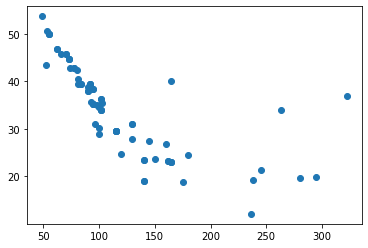

In [8]:
plt.scatter(x = 'HP', y = 'MPG', data = cars_data)

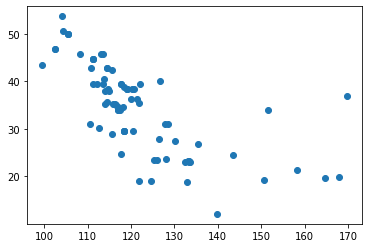

In [9]:
plt.scatter(x = 'SP', y = 'MPG', data = cars_data)

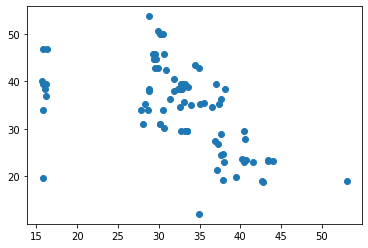

In [10]:
plt.scatter(x = 'WT', y = 'MPG', data = cars_data)

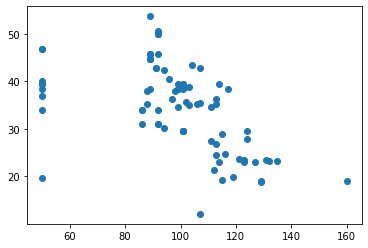

In [11]:
plt.scatter(x = 'VOL', y = 'MPG', data = cars_data)

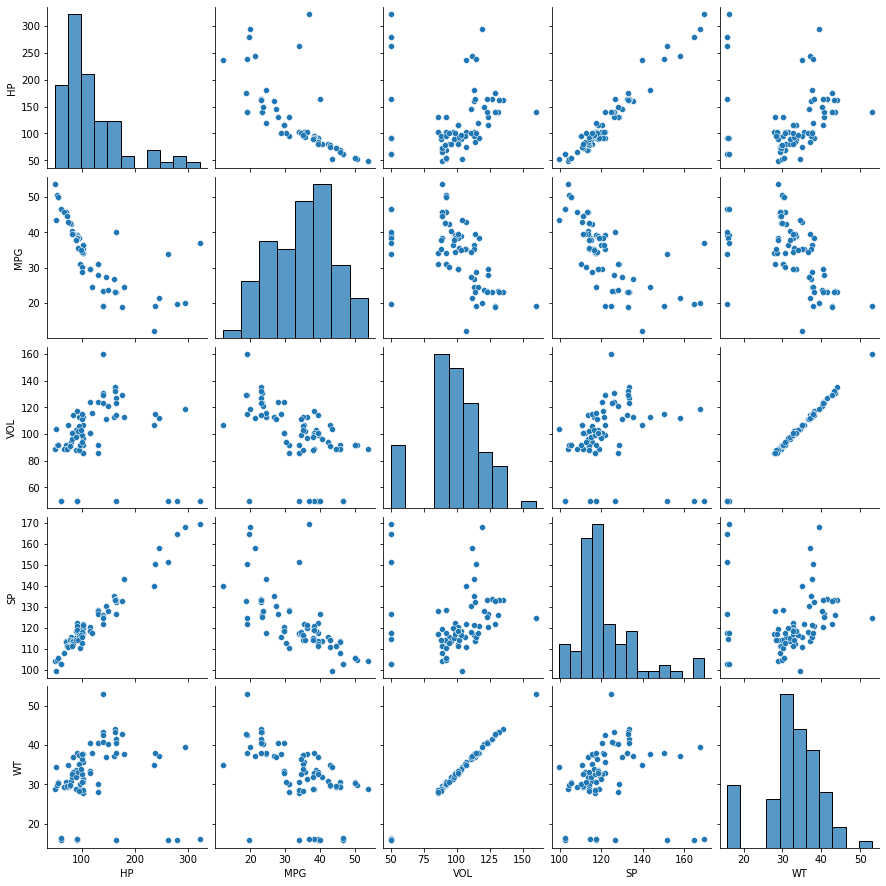

In [13]:
sns.pairplot(cars_data)

### 4.2 Multicollinearity Check

1. Correlation Matrix
2. VIF - Variance Inflation Factor

In [17]:
cars_data.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [20]:
# MultiCollinearity - High multicollinearit columns can be dropped
X = np.array(cars_data)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
print(vif)
X=pd.DataFrame()

[78.92496604085201, 63.51692325405163, 12712.450298627089, 435.16739535695325, 12179.435285622612]


## Point to Remember

* Higher the VIF score, high Multicollinearity
* Lesser the VIF score, lesser the multicollinearity

## 5. Data Preparation/Data Preprocessing

In [21]:
cars_data.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [22]:
cars_data.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

## 6. Model building

In [25]:
X = cars_data[['HP','VOL','SP','WT']]
y = cars_data[['MPG']]

In [26]:
X

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [27]:
y

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 12)

In [74]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(64, 4)
(64, 1)
(17, 4)
(17, 1)


In [84]:
X_train

,HP,VOL,SP,WT
59,100,115,115.576579,37.662874
63,140,123,125.312342,40.722831
28,52,104,99.564907,34.483207
40,95,113,116.392639,37.392524
43,95,88,114.093382,28.343976
...,...,...,...,...
3,70,92,113.461264,30.632114
2,55,92,105.461264,30.193597
6,55,92,105.461264,30.308480
27,92,99,119.105055,32.835069


In [85]:
X_test

,HP,VOL,SP,WT
57,115,101,118.288996,32.734518
12,92,99,122.105055,32.813592
14,66,89,108.185353,29.347279
7,62,50,102.598513,15.847758
42,102,92,117.461264,30.527427
41,95,106,115.748847,35.027176
8,62,50,102.598513,16.359484
68,165,123,133.312342,40.472042
29,103,107,121.840817,35.549360
17,92,50,117.598513,16.194122


In [50]:
y_test

,MPG
38,34.070668
2,50.013401
26,38.411003
14,45.734893
74,19.086341
70,19.678507
80,12.101263
69,21.273708
6,50.013401
31,39.431235


In [57]:
X_test

,HP,VOL,SP,WT
38,102,86,116.909442,28.630502
2,55,92,105.461264,30.193597
26,92,117,120.760520,38.062823
14,66,89,108.185353,29.347279
74,140,129,121.864163,42.618698
70,280,50,164.598513,15.823060
80,236,107,139.840817,34.948615
69,245,112,158.300669,37.141733
6,55,92,105.461264,30.308480
31,84,101,112.288996,33.234361


In [86]:
from sklearn.linear_model import LinearRegression
linear_model =  LinearRegression()

## 7. Model Training

In [87]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [88]:
linear_model.coef_ #Slope 

array([[-0.19037532, -0.46880054,  0.37860499,  0.68495607]])

In [89]:
linear_model.intercept_ # c

array([35.24322435])

## 8. Model Testing

In [90]:
#Seen data
y_train_pred = linear_model.predict(X_train)
y_train_pred

array([[31.84891407],
       [26.26544167],
       [37.90370433],
       [33.86217856],
       [38.5138239 ],
       [36.30847247],
       [22.62323268],
       [28.05889807],
       [37.18009477],
       [19.00654776],
       [25.76354891],
       [26.56197102],
       [23.44572669],
       [21.77337396],
       [41.83050633],
       [39.38123004],
       [25.97959426],
       [38.86711093],
       [49.60253102],
       [42.43953488],
       [36.62860809],
       [35.62412115],
       [42.04599212],
       [28.4999423 ],
       [35.68327873],
       [41.99570757],
       [40.27270958],
       [48.6651069 ],
       [13.88294336],
       [33.9231852 ],
       [35.75660232],
       [30.16637073],
       [33.68869062],
       [40.90874672],
       [36.47557668],
       [29.93194311],
       [38.5521749 ],
       [41.26459975],
       [33.53611171],
       [17.10153823],
       [41.53420536],
       [37.24797144],
       [28.02219808],
       [34.14665787],
       [34.54639253],
       [39

In [91]:
#Unseen data
y_test_pred = linear_model.predict(X_test)
y_test_pred

array([[33.20771927],
       [40.02289413],
       [42.01631654],
       [49.69925455],
       [38.07665913],
       [35.2798795 ],
       [50.049764  ],
       [24.3631194 ],
       [35.95220006],
       [49.90431366],
       [34.6709292 ],
       [37.63508988],
       [17.03568886],
       [36.86927074],
       [28.58666317],
       [39.72128407],
       [31.65402822]])

## 9. Model Evaluation

#### 9.1 Training Accuracy

In [94]:
from sklearn.metrics import mean_squared_error,r2_score
print("MSE : {}.".format(mean_squared_error(y_train,y_train_pred)))
print("R2_score : {}.".format(r2_score(y_train,y_train_pred)))

MSE : 19.13645681092646.
R2_score : 0.7608639377971149.


#### 9.2 Testing Accuracy

In [93]:
print("MSE : {}.".format(mean_squared_error(y_test,y_test_pred)))
print("R2_score : {}.".format(r2_score(y_test,y_test_pred)))

MSE : 23.45787459761914.
R2_score : 0.7415058241692882.


## Model Performance for Training and Testing data

#### Train Accuracy and Error
MSE : 18.043439658379057.
R2_score : 0.7427583839189714.
    
#### Test Accuracy and Error
MSE : 26.652842725404607.
R2_score : 0.7895266465558202.

In [56]:
#pd.DataFrame({'y_actual':y_test,
#              'y_pred' : y_pred})

# 10. Model Optimization

In [96]:
import statsmodels.formula.api as smf

In [104]:
model = smf.ols('MPG~HP + SP + VOL + WT', data = cars_data).fit()

In [105]:
#Slope - m
model.params

Intercept    30.677336
HP           -0.205444
SP            0.395627
VOL          -0.336051
WT            0.400574
dtype: float64

In [106]:
model.pvalues 

#Null Hypothesis : There is no significance difference/importance for me.
#Alt Hypothesis : There is a significance difference. You are important.

#p<0.05, reject Null Hypothesis

Intercept    0.042936
HP           0.000001
SP           0.014579
VOL          0.556294
WT           0.813649
dtype: float64

In [111]:
#Model - 2
model_2 = smf.ols('MPG~ HP + SP', data = cars_data).fit()

In [112]:
model_2.pvalues

Intercept    0.208002
HP           0.002129
SP           0.284508
dtype: float64

In [113]:
#Model - 3
model_3 = smf.ols('MPG~ HP', data = cars_data).fit()

In [114]:
model_3.pvalues

Intercept    1.211037e-44
HP           1.956490e-14
dtype: float64

In [118]:
#Model - 4
model_4 = smf.ols('MPG~ SP', data = cars_data).fit()

In [119]:
model_4.pvalues

Intercept    1.457105e-22
SP           1.407325e-12
dtype: float64

In [120]:
#Model - 5
model_5 = smf.ols('MPG~ VOL', data = cars_data).fit()

In [121]:
model_5.pvalues

Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64

In [122]:
#Model - 6
model_6 = smf.ols('MPG~ WT', data = cars_data).fit()

In [123]:
model_6.pvalues

Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64

In [124]:
#Model -7
model_7 = smf.ols('MPG~ VOL + WT', data = cars_data).fit()

In [125]:
model_7.pvalues

Intercept    2.141975e-20
VOL          4.800657e-01
WT           6.255966e-01
dtype: float64

In [129]:
#Model - 8
model_8 = smf.ols('MPG~ SP + HP + VOL', data = cars_data).fit()

In [127]:
model_8.pvalues

Intercept    4.194554e-02
SP           1.207855e-02
HP           8.644870e-07
VOL          1.648229e-13
dtype: float64

In [130]:
#Model - 9
model_9 = smf.ols('MPG~ SP + HP + WT', data = cars_data).fit()

In [132]:
model_9.pvalues

Intercept    5.053995e-02
SP           1.089096e-02
HP           7.560276e-07
WT           1.914892e-13
dtype: float64

## 11. Optimized Model's Evaluation

In [141]:
model.aic,model.rsquared

(477.9279049354879, 0.7705372737359844)

In [142]:
model_2.aic,model_2.rsquared

(531.5481466080847, 0.5326391712851649)

In [143]:
model_3.aic,model_3.rsquared

(530.7452702659343, 0.5256806086282022)

In [144]:
model_4.aic,model_4.rsquared

(539.408199092848, 0.4721402334141218)

In [145]:
model_5.aic,model_5.rsquared

(564.5634161305575, 0.27990086511227064)

In [146]:
model_6.aic,model_6.rsquared

(564.8358142145094, 0.2774751389270127)

In [147]:
model_7.aic,model_7.rsquared

(566.3145901819738, 0.2821095616445982)

In [148]:
model_8.aic,model_9.rsquared

(475.98751588546094, 0.7694828139983457)

In [149]:
model_9.aic,model_9.rsquared

(476.2992750152977, 0.7694828139983457)

In [ ]:
#Model 2 - HP + WT            - 531.5481466080847, 0.5326391712851649
#Model   - HP + WT + SP + VOL - 477.9279049354879, 0.7705372737359844
#Model 7 - VOL + WT           - 566.3145901819738, 0.2821095616445982
#Model 8 - SP + HP +VOL       - 475.98751588546094, 0.7694828139983457
#Model 9 - SP + HP +WT        - 476.2992750152977, 0.7694828139983457

In [ ]:
#Model   - HP + WT + SP + VOL - 477.9279049354879, 0.7705372737359844
#Model 8 - SP + HP +VOL       - 475.98751588546094,0.7694828139983457
#Model 9 - SP + HP +WT        - 476.2992750152977, 0.7694828139983457